<a href="https://colab.research.google.com/github/kiraneranki/ImageDetection/blob/main/ImageEdgeDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

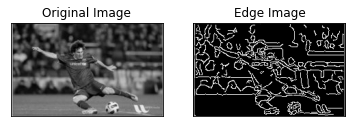

(array([[  0.,   0.,   0., ...,   0.,   0., 138.],
        [  0.,   0.,   0., ...,   0.,   0., 138.],
        [  0.,   0.,  16., ...,   0.,   0.,   1.],
        ...,
        [ 21.,  15.,  33., ...,   0.,   0.,   1.],
        [  0.,   0.,   0., ...,  51.,   1.,   1.],
        [  0.,   0.,   0., ...,   0.,   0., 138.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 224 Lists of Patches objects>)

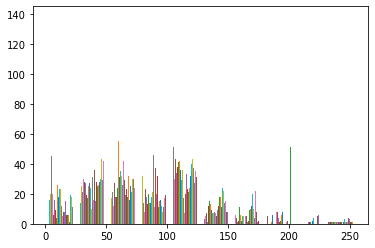

In [20]:
img = cv2.imread('/content/sample_data/messi.jpg',0)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()
plt.hist(img,)

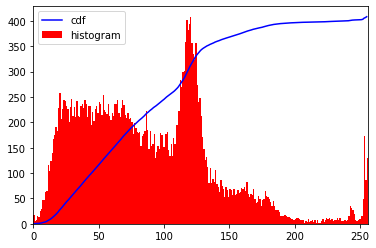

In [21]:
img = cv2.imread('/content/sample_data/messi.jpg',0)

hist,bins = np.histogram(img.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [22]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

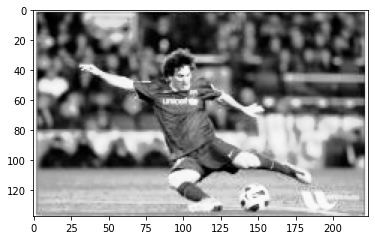

In [36]:
plt.imshow(img,cmap='gray')
plt.imshow(cdf[img],cmap='gray')

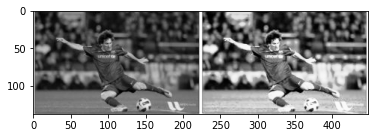

In [40]:
img = cv2.imread('/content/sample_data/messi.jpg',0)
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
cv2.imwrite('res.png',res)
plt.imshow(res,cmap='gray')

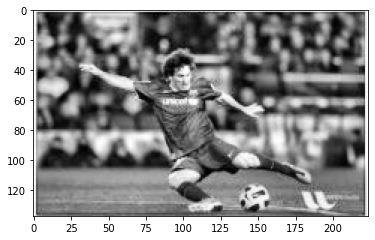

In [43]:
# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)

cv2.imwrite('clahe_2.jpg',cl1)
plt.imshow(cl1,cmap='gray')